In [9]:
# Import required libraries and custom module
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Add src to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from hypothesis_testing import prepare_data, check_group_balance, test_hypothesis, visualize_results, generate_business_recommendations

# Enable inline plotting
%matplotlib inline

In [10]:
# Pull data from DVC
!dvc pull ../data/processed/cleaned_data.csv.dvc

# Load and prepare data
data_path = os.path.join(os.getcwd(), '..', 'data', 'processed', 'cleaned_data.csv')
df = pd.read_csv(data_path)
df = prepare_data(df)

# Add ZipGroup for segmentation
df['ZipGroup'] = pd.qcut(df['PostalCode'].rank(method='first'), 2, labels=['Low', 'High'])

# Display basic info
print(df.head())

Everything is up to date.
   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01             True   
1               145249     12827       2015-05-01             True   
2               145249     12827       2015-07-01             True   
3               145255     12827       2015-05-01             True   
4               145255     12827       2015-07-01             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ... StatutoryClass StatutoryRiskType TotalPremium  \
0  Current account  ...     Commercial     IFRS


=== Hypothesis 1: No risk differences across provinces ===
Group: Control: Gauteng, Test: Western Cape
Mean_RegistrationYear: Control 2010.24, Test 2010.38
VehicleType_Dist_Control: {'Passenger Vehicle': 0.9455295596206822, 'Medium Commercial': 0.0478234928211443, 'Heavy Commercial': 0.0035799068208650173, 'Light Commercial': 0.0028131466365379, 'Bus': 0.0002538941007705686}
VehicleType_Dist_Test: {'Passenger Vehicle': 0.9368603480175179, 'Medium Commercial': 0.039801868896227076, 'Heavy Commercial': 0.017014449987119137, 'Light Commercial': 0.006024731258343287, 'Bus': 0.0002986018407925244}
PlanType_Dist_Control: {}
Claim Frequency - Chi-squared: Stat: 56.09, p-value: 0.0000, Reject H0
Claim Severity - t-test: Stat: 1.87, p-value: 0.0622, Fail to reject H0


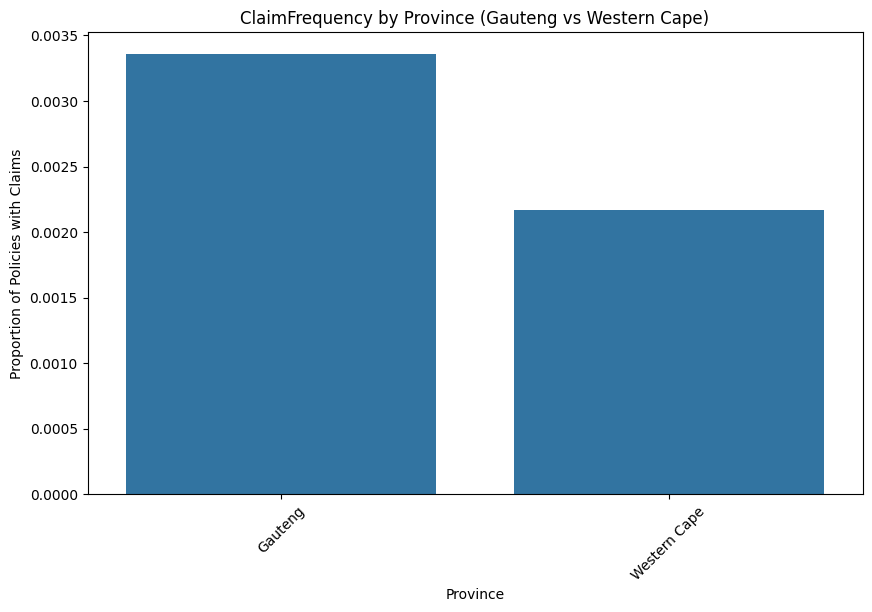

In [11]:
# Initialize results list
results = []

# Hypothesis 1: No risk differences across provinces (Gauteng vs Western Cape)
print("\n=== Hypothesis 1: No risk differences across provinces ===")
df_prov = df[df['Province'].isin(['Gauteng', 'Western Cape'])].copy()
balance_report = check_group_balance(df_prov, ['RegistrationYear', 'VehicleType', 'PlanType'], 'Province', 'Gauteng', 'Western Cape')
for key, value in balance_report.items():
    print(f"{key}: {value}")

# Claim Frequency
freq_result = test_hypothesis('Province', df_prov, 'ClaimFrequency', 'Gauteng', 'Western Cape')
results.append({'Hypothesis': 'No risk differences across provinces (Frequency)', 'Control': 'Gauteng', 'Test': 'Western Cape', **freq_result})
print(f"Claim Frequency - {freq_result['Test']}: Stat: {freq_result['Statistic']:.2f}, p-value: {freq_result['p-value']:.4f}, {freq_result['Decision']}")

# Claim Severity
sev_result = test_hypothesis('Province', df_prov, 'ClaimSeverity', 'Gauteng', 'Western Cape')
results.append({'Hypothesis': 'No risk differences across provinces (Severity)', 'Control': 'Gauteng', 'Test': 'Western Cape', **sev_result})
print(f"Claim Severity - {sev_result['Test']}: Stat: {sev_result['Statistic']:.2f}, p-value: {sev_result['p-value']:.4f}, {sev_result['Decision']}")

# Visualization
visualize_results(df_prov, 'Province', 'ClaimFrequency', 'Gauteng', 'Western Cape')


=== Hypothesis 2: No risk differences between zip codes ===
Group: Control: Low, Test: High
Mean_RegistrationYear: Control 2010.20, Test 2010.25
VehicleType_Dist_Control: {'Passenger Vehicle': 0.919761863337393, 'Medium Commercial': 0.06783935174352913, 'Heavy Commercial': 0.007279286629910269, 'Light Commercial': 0.004051602942911595, 'Bus': 0.001067895346256067}
VehicleType_Dist_Test: {'Passenger Vehicle': 0.948355061204002, 'Medium Commercial': 0.040120068233313134, 'Heavy Commercial': 0.007521262916234209, 'Light Commercial': 0.0037416333199346463, 'Bus': 0.0002619743265160014}
PlanType_Dist_Control: {}
Claim Frequency - Chi-squared: Stat: 10.27, p-value: 0.0013, Reject H0
Claim Severity - t-test: Stat: -3.22, p-value: 0.0013, Reject H0


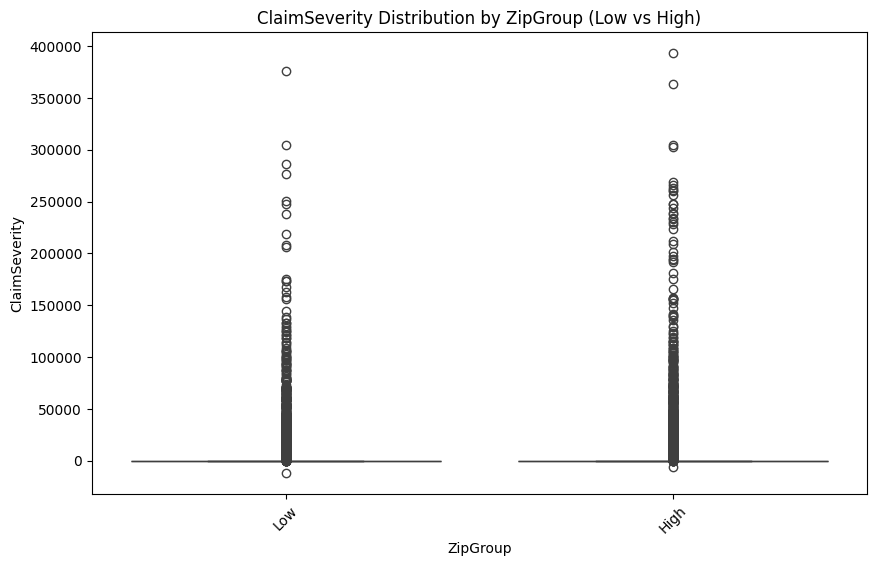

In [12]:
# Hypothesis 2: No risk differences between zip codes (Low vs High)
print("\n=== Hypothesis 2: No risk differences between zip codes ===")
df_zip = df[df['ZipGroup'].isin(['Low', 'High'])].copy()
balance_report = check_group_balance(df_zip, ['RegistrationYear', 'VehicleType', 'PlanType'], 'ZipGroup', 'Low', 'High')
for key, value in balance_report.items():
    print(f"{key}: {value}")

# Claim Frequency
freq_result = test_hypothesis('ZipGroup', df_zip, 'ClaimFrequency', 'Low', 'High')
results.append({'Hypothesis': 'No risk differences between zip codes (Frequency)', 'Control': 'Low', 'Test': 'High', **freq_result})
print(f"Claim Frequency - {freq_result['Test']}: Stat: {freq_result['Statistic']:.2f}, p-value: {freq_result['p-value']:.4f}, {freq_result['Decision']}")

# Claim Severity
sev_result = test_hypothesis('ZipGroup', df_zip, 'ClaimSeverity', 'Low', 'High')
results.append({'Hypothesis': 'No risk differences between zip codes (Severity)', 'Control': 'Low', 'Test': 'High', **sev_result})
print(f"Claim Severity - {sev_result['Test']}: Stat: {sev_result['Statistic']:.2f}, p-value: {sev_result['p-value']:.4f}, {sev_result['Decision']}")

# Visualization
visualize_results(df_zip, 'ZipGroup', 'ClaimSeverity', 'Low', 'High')


=== Hypothesis 3: No margin differences between zip codes ===
Margin - t-test: Stat: 1.23, p-value: 0.2185, Fail to reject H0


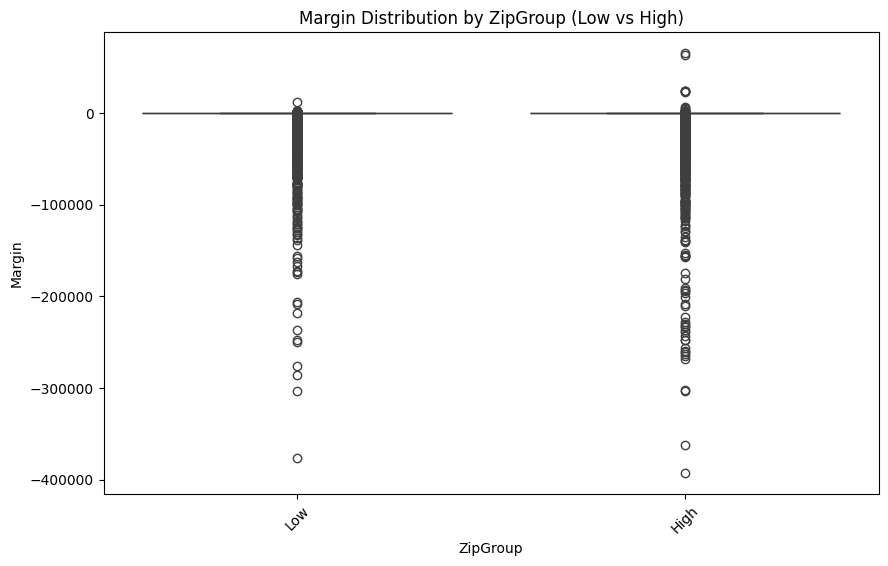

In [13]:
# Hypothesis 3: No margin differences between zip codes
print("\n=== Hypothesis 3: No margin differences between zip codes ===")
margin_result = test_hypothesis('ZipGroup', df_zip, 'Margin', 'Low', 'High')
results.append({'Hypothesis': 'No margin differences between zip codes', 'Control': 'Low', 'Test': 'High', **margin_result})
print(f"Margin - {margin_result['Test']}: Stat: {margin_result['Statistic']:.2f}, p-value: {margin_result['p-value']:.4f}, {margin_result['Decision']}")

# Visualization
visualize_results(df_zip, 'ZipGroup', 'Margin', 'Low', 'High')


=== Hypothesis 4: No risk differences between Women and Men ===
Group: Control: M, Test: F
Mean_RegistrationYear: Control 2010.24, Test 2010.33
VehicleType_Dist_Control: {'Passenger Vehicle': 0.9434103276735876, 'Medium Commercial': 0.05404395450405213, 'Heavy Commercial': 0.0025457178223602774}
VehicleType_Dist_Test: {'Passenger Vehicle': 0.973501110288675, 'Medium Commercial': 0.026498889711324945}
PlanType_Dist_Control: {}
Claim Frequency - Chi-squared: Stat: 0.00, p-value: 0.9515, Fail to reject H0
Claim Severity - t-test: Stat: -0.30, p-value: 0.7670, Fail to reject H0


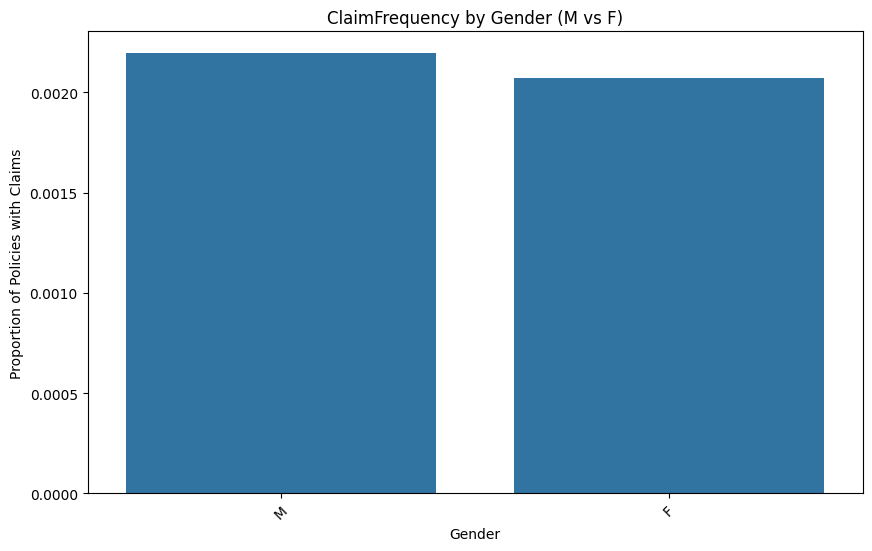

In [14]:
# Hypothesis 4: No risk differences between Women and Men
print("\n=== Hypothesis 4: No risk differences between Women and Men ===")
df_gender = df[df['Gender'].isin(['M', 'F'])].copy()
balance_report = check_group_balance(df_gender, ['RegistrationYear', 'VehicleType', 'PlanType'], 'Gender', 'M', 'F')
for key, value in balance_report.items():
    print(f"{key}: {value}")

# Claim Frequency
freq_result = test_hypothesis('Gender', df_gender, 'ClaimFrequency', 'M', 'F')
results.append({'Hypothesis': 'No risk differences between genders (Frequency)', 'Control': 'M', 'Test': 'F', **freq_result})
print(f"Claim Frequency - {freq_result['Test']}: Stat: {freq_result['Statistic']:.2f}, p-value: {freq_result['p-value']:.4f}, {freq_result['Decision']}")

# Claim Severity
sev_result = test_hypothesis('Gender', df_gender, 'ClaimSeverity', 'M', 'F')
results.append({'Hypothesis': 'No risk differences between genders (Severity)', 'Control': 'M', 'Test': 'F', **sev_result})
print(f"Claim Severity - {sev_result['Test']}: Stat: {sev_result['Statistic']:.2f}, p-value: {sev_result['p-value']:.4f}, {sev_result['Decision']}")

# Visualization
visualize_results(df_gender, 'Gender', 'ClaimFrequency', 'M', 'F')

In [15]:
# Generate and display business recommendations
results_df = pd.DataFrame(results)
recommendations = generate_business_recommendations(df, results_df)
print("\n=== Business Recommendations ===")
for rec in recommendations:
    print(rec)

# Save results
os.makedirs('data', exist_ok=True)
results_df.to_csv('data/hypothesis_test_results.csv', index=False)
print("Results saved to data/hypothesis_test_results.csv")

# Track with DVC
!dvc add data/plots/claim_frequency_province.png data/plots/claim_severity_zip.png data/plots/margin_zipcode.png data/plots/claim_frequency_gender.png
!dvc add data/hypothesis_test_results.csv
!dvc push


=== Business Recommendations ===
- No risk differences across provinces (Frequency): We reject H0 (p = 0.0000). Gauteng shows a nan% higher loss ratio than Chi-squared, suggesting a regional premium adjustment.
- No risk differences between zip codes (Frequency): We reject H0 (p = 0.0013). Chi-squared zip group shows a nan% higher claim frequency, indicating zip-code-based risk segmentation.
Results saved to data/hypothesis_test_results.csv


ERROR: stage working dir 'd:\Projects\Python\insurance-risk-analytics\notebooks\data\plots' does not exist
⠋ Checking graph



Everything is up to date.
